In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

# Método de Euler 

Queremos achar a solução de:

### $\frac{dy}{dx} = f(x, y)$
Consideramos que: $y_0 = y(x_0)$

Definimos o intervalo
### $I = [x_0, x_f]$
Onde $y(x)$ é contínua

E tomamos $n$ pontos $x_l$ igualmente espaçados por $h$:
### $h = \frac{x_f - x_0}{n}$

Sendo que:
### $x_l = x_0 + hl, l = 0, 1, 2, ..., n$

E aí fazendo umas expansões de taylor loucas e tal a gente chega em:

### $y_{l+1} = f(x_l, y_l)h$
### $y_0 = y(x_0)$
### $h=\frac{x_f - x_0}{n}$
### $l = 0, 1, 2, ..., n-1$

In [2]:
def metodo_de_euler(y0, n, I, f):
    """
    y0: valor inicial de y
    n: quantos pontos teremos no dominio I
    I: lista do tipo [x0, xf]
    f: função do tipo f(x,y) callback que com base em valor de x e y, retorna resultado 
    """
    x = []
    y = [y0]
    h = (I[1] - I[0])/n
    for l in range(n+1):
        x.append(I[0] + h * l)
    for i in range(1, n+1):
        y.append(y[i-1] + h*f(x[i-1], y[i-1]))
    return np.array(y)       

In [3]:
funcao = lambda x, y: -x*y
I = [0, 1]
n = 10
y0 = 1
print(metodo_de_euler(y0, n, I, funcao))

[1.         1.         0.99       0.9702     0.941094   0.90345024
 0.85827773 0.80678106 0.75030639 0.69028188 0.62815651]


# Método de Euler Modificado (ou Runge-Kutta de ordem 2)

### $y_{l+1} = y_l + \frac{h}{2} (K_1 + K_2)$

### $K_1 = f(x_l, y_l)$
### $K_2 = f(x_{l+1}, y_l + h \times K_1)$

## Prova 
![Confia](https://pt-static.z-dn.net/files/d9c/1929a38a25154c8991c29165efec84ca.jpg)

In [4]:
def euler_modificado(y0, n, I, f):
    """
    y0: valor inicial de y
    n: quantos pontos teremos no dominio I
    I: lista do tipo [x0, xf]
    f: função do tipo f(x,y) callback que com base em valor de x e y, retorna resultado 
    """
    x = []
    y = [y0]
    h = (I[1] - I[0])/n
    for l in range(n+1):
        x.append(I[0] + h * l)
    for l in range(1, n+1):
        K1 = f(x[l-1], y[l-1])
        K2 = f(x[l], y[l-1] + h*K1)
        y.append(y[l-1] + (K1+K2)*h/2)
    return np.array(y)

In [5]:
funcao = lambda x, y: -3*x*x*y
I = [0, 1]
n = 10
y0 = 2
print(euler_modificado(y0, n, I, funcao))

[2.         1.997      1.98205845 1.9437294  1.87209908 1.76033477
 1.60639349 1.41432987 1.19455998 0.96260988 0.73634843]


# Método de Euler para sistemas de EDO
Tendo o sistema:
### $ y' = f(x, y, z)\\z' = g(x, y, z)$

Com condição inicial $y(x_0) = y_0, z(x_0) = z_0$

A solução será do tipo
### $Y(x_l) = \begin{bmatrix} y(x_l) \\ z(x_l) \end{bmatrix}$

Sendo dado por:

### $Y_{l+1} = Y_l + \frac{h}{2} \times (K_1 + K_2)$

### $K_1 = \begin{bmatrix} f(x_l, y_l, z_l) \\ g(x_l, y_l, z_l) \end{bmatrix} =
\begin{bmatrix} K_{11} \\ K_{21} \end{bmatrix}
$

### $K_2 = \begin{bmatrix} 
f(x_{l+1}, y_l + h\times K_{11}, z_l + h \times K_{21} \\
g(x_{l+1}, y_l + h\times K_{11}, z_l + h \times K_{21}
\end{bmatrix}$

In [36]:
def euler_sistema(y0, z0, n, I, f, g):
    """
    y0: valor inicial de y
    z0: valor inicial de z
    n: quantos pontos teremos no dominio I
    I: lista do tipo [x0, xf]
    f: função de callback do tipo f(x, y, z)
    g: função de callback do tipo g(x, y, z)
    """
    x = []
    y = [y0]
    z = [z0]
    h = (I[1] - I[0])/n
    for l in range(n+1):
        x.append(I[0] + h * l)
    for l in range(1, n+1):
        K1y = f(x[l-1], y[l-1], z[l-1])
        K1z = g(x[l-1], y[l-1], z[l-1])
        
        K2y = f(x[l-1]+h/2, y[l-1] + h/2 * K1y, z[l-1] + h/2 * K1z)
        K2z = g(x[l-1]+h/2, y[l-1] + h/2 * K1y, z[l-1] + h/2 * K1z)
        
        y.append(y[l-1] + (K2y)/2)
        z.append(z[l-1] + (K2z)/2)
    Y = []
    for i in range(len(y)):
        tmp = [y[i], z[i]]
        Y.append(tmp)
        
    return np.array(Y)

In [37]:
y0 = 4
z0 = 2
I = [0, 1]
n = 2
f = lambda x, y, z: z
g = lambda x, y, z: -x*z-2*y
resultado = euler_sistema(y0, z0, n, I, f, g)
print(resultado)

[[ 4.         2.       ]
 [ 4.        -2.5      ]
 [ 1.90625   -4.3046875]]


# Método de Range-Kutta de ordem 4

### $y_{l+1} = y_l + \frac{h}{6} \times (K_1 + 2 K_2 + 2 K_3 + K_4)$

### $K_1 = f(x_l, y_l)$
### $K_2 = f(x_l + \frac{h}{2}, y_l + \frac{h}{2} \times K_1)$
### $K_3 = f(x_l + \frac{h}{2}, y_l + \frac{h}{2} \times K_2)$
### $K_4 = f(x_l + h, y_l + h \times K_3)$

In [8]:
def runge_kutta_4(y0, n, I, f):
    """
    y0: valor inicial de y
    n: quantos pontos teremos no dominio I
    I: lista do tipo [x0, xf]
    f: função do tipo f(x,y) callback que com base em valor de x e y, retorna resultado 
    """
    x = []
    y = [y0]
    h = (I[1] - I[0])/n
    for l in range(n+1):
        x.append(I[0] + h * l)
    
    for l in range(1, n+1):
        K1 = f(x[l-1], y[l-1])
        K2 = f(x[l-1] + h/2, y[l-1] + K1*h/2)  
        K3 = f(x[l-1] + h/2, y[l-1] + K2*h/2)  
        K4 = f(x[l-1] + h, y[l-1] + K3*h)  
        y.append(y[l-1] + (K1+2*K2+2*K3+K4)*h/6)
    return np.array(y)

In [9]:
y0 = 1
I = [0, 0.1]
n = 1
f = lambda x, y: -x*y
resultado = runge_kutta_4(y0, n, I, f)
print(resultado)

[1.         0.99501248]


# Zero de Funções

Cansei de fazer o markdown, então só vou falar o q vc precisa fazer

Você vai ter uma função $f(x)$ e precisa determinar um intervalo $I = [a;b]$ em que a raiz seja isolada.

Em outras palavras, neste intervalo só vai ter um $f(x)=0, x \in I$ e então o algoritmo vai tentando achar qual é esse $x$

In [10]:
def metodo_bisseccao(I, f, iteracoes):
    """
    Recebe intervalo I, funcao callback f e numero de iterações
    OBS: Nos parametros chame uma cópia de I, pois o mesmo vai ser alterado
    durante execução!
    """
    a = I[0]
    b = I[1]
    if iteracoes == 0:
        return [(a+b)/2]
    else:
        lista_de_x = metodo_bisseccao(I, f, iteracoes-1)
        x_anterior = lista_de_x[-1]
        f_anterior = f(x_anterior)
        if f_anterior == 0:
            return lista_de_x
        f_a = f(a)
        f_b = f(b)
        if f_a * f_anterior < 0:
            I[1] = x_anterior
            return lista_de_x + [(I[0] + x_anterior)/2]
        else:
            I[0] = x_anterior
            return lista_de_x + [(I[1] + x_anterior)/2]
            
iteracoes_para_erro = lambda I, f, erro: round(math.log((I[1]-I[0])/erro, 2)) - 1 # Acha iteracoes para erro menor que erro
    

In [11]:
I = [1, 2]
f = lambda x: x*x*x - 2
a = (metodo_bisseccao(I.copy(), f, 1))

print(iteracoes_para_erro(I, f, 0.00000000000000001))


55


# Métodos de Convergência

A partir daqui as coisas ficam mais complicadas e um caderno de python não vai ajudar tanto, pq vc depende de derivadas de funções, então eu criei uma função que plota gráficos aproximados disso. O primeiro serve só pra plota grafico das derivadas e já da pra dar aquela analisada.

## Ponto Fixo
Achar zeros através de buscas binárias pode ser difícil e ineficientes (muitas iterações para reduzir o erro), o método do ponto fixo busca construir uma função $\phi(x)$ a partir de $f(x)$, tal que $\exists \phi(x^*) = x^*$.

Isso é útil, pois $0 = x^* - \phi(x^*)$, então se: $f(x) = x - \phi(x)$, podemos dizer:

### $\phi(x) = x + a(x)f(x), a(x) \ne 0 {\ }\forall x$ $f(x^*) = 0 \iff x^* = g(x^*)$

### Regras para convergência do Ponto Fixo
- $\phi$ e $\phi '$ são contínuas em I
- $max|\phi'(x)| \le k \lt 1, x\in I$
- $x_0 \in I, x_{n+1} = \phi(x_n) \in I, n =0, 1, 2,...$

Se isso for verdadeiro, $x_{n+1} = \phi(x_n)$ converge para $x^*$


### Escolhendo $x_0$
Sendo $I = ]a; b[$
Queremos $x_0$ sendo o extremo mais próximo de $I$
1. se $g(\frac{a+b}{2}) \gt 0, b$ é o extremo mais próximo de $x_0$
2. se $g(\frac{a+b}{2}) \lt 0, a$ é o extremo mais próximo de $x_0$
3. se $g(\frac{a+b}{2}) = 0$ você achou $x^* = \frac{a+b}{2}$


## Convergência de Newton
Caso particular do ponto fixo
Constrói $\phi(x)$ de forma que $\phi'(x) = 0$
### $\phi (x_n) = x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$
### Regras para convergência de Newton
 - $f'(x)$ e $f''(x)$ são contínuas em $[a;b]$
 - $f'(x) \ne 0 $ e $f''(x) \ne 0$ para $x \in [a;b]$
 - $f'(x)$ e $f''(x)$ são contínuas em $[a;b]$
  


In [12]:
def plota_funcao(I, f, n_pontos = 10000):
    NUMERO_DE_PONTOS=n_pontos
    DELTA_X = 0.001
    DELTA_X_2 = DELTA_X * DELTA_X
    
    x = [I[0]]
    y = [f(x[0])]
    zeros = [0]
    x_linha = []
    y_linha = []
    aumento = (I[1] - I[0])/ NUMERO_DE_PONTOS
    
    for i in range(1, NUMERO_DE_PONTOS):
        x.append(x[i-1] + aumento)
        y.append(f(x[i]))
        zeros.append(0)
        
    fig, ax = plt.subplots()
    ax.plot(x, y, label = "Função")
    ax.set_title("f(x)")
    plt.show()
    
    fig, ax = plt.subplots()
    
    for i in range(NUMERO_DE_PONTOS):
        tg = 2 * DELTA_X
        y_linha.append((-f(x[i] - DELTA_X) + f(x[i] + DELTA_X))/tg)
    ax.plot(x, y_linha)
    ax.set_title("f'(x)")
    plt.show()
    DELTA_X = 0.1
    
    fig, ax = plt.subplots()
    y_2_linha = []
    for i in range(NUMERO_DE_PONTOS):

        y_2_linha.append((f(x[i]+DELTA_X) - 2*f(x[i]) + f(x[i]-DELTA_X))/(DELTA_X_2))
    ax.plot(x, y_2_linha)
    
    plt.show()
    print(len(x))

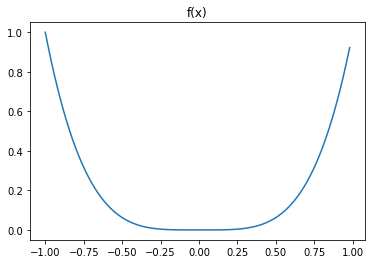

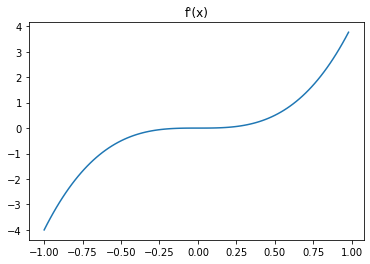

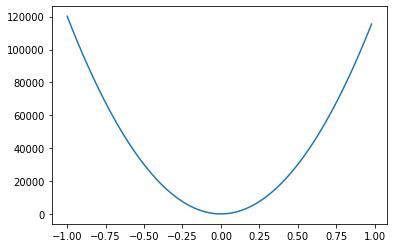

100


In [13]:
I = [-1, 1]
funcao = lambda x: x*x*x*x
plota_funcao(I, funcao, 100)

In [16]:
def acha_x0(I, g):
    conta = g((I[0] + I[1])/2)
    if conta == 0:
        return conta
    if conta > 0:
        return I[1]
    else:
        return I[0]

def ponto_fixo_oscilante(I, g, iteracoes, erro):
    x0 = acha_x0(I, g)
    x = [x0]
    k = 0
    while k <= iteracoes:
        x.append(g(x[-1]))
        if abs(x[-1] - x[-2]) <= erro:
            break
        else:
            k += 1
    return x[-1]

def ponto_fixo(I, g, iteracoes, erro, crescente, phi):
    x0 = acha_x0(I, g)
    x = x[x0]
    k = 0
    if not crescente:
        erro *= -1 
    while k <= iteracoes:
        x.append(g(x[-1]))
        if phi(g, x[-1] + 2*erro) > 0:
            k += 1
        else:
            break
    return x[-1] + erro

def ponto_fixo_crescente(I, g, iteracoes, erro):
    phi=lambda g, x: g(x) - x
    return ponto_fixo(I, g, iteracoes, erro, True, phi)
    


def ponto_fixo_decrescente(I, g, iteracoes, erro):
    phi=lambda g, x: g(x) - x
    return ponto_fixo(I, g, iteracoes, erro, False, phi)

def metodo_newton_crescente(I, f, f_linha, iteracoes):
    g = lambda x: x - f(x)/f_linha(x)
    phi = lambda g, x: g(x) - x
    return ponto_fixo(I, g, iteracoes, erro, True, phi)

def metodo_newton_decrescente(I, f, f_linha, iteracoes):
    g = lambda x: x - f(x)/f_linha(x)
    phi = lambda g, x: g(x) - x
    return ponto_fixo(I, g, iteracoes, erro, False, phi)
    
    